# PG AI - Data Science with Python
# Assessement Project: Comcast Telecom Consumer Complaints Project

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

By Edson Teixeira
teixeiraedson252@gmail.com
November 18th 2021

# Analysis Task
1 - Import data into Python environment.  <br>

2 - Provide the trend chart for the number of complaints at monthly and daily granularity levels. <br>

3 - Provide a table with the frequency of complaint types. <br>
a)Which complaint types are maximum i.e., around internet, network issues, or across any other domains. <br>

4 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed. <br>

5 - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on: <br>
a) Which state has the maximum complaints <br>
b) Which state has the highest percentage of unresolved complaints <br>

6 - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls. <br>

### 1 - Import data into Python environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path

['C:\\Users\\Fortnite\\Documents\\PostGraduateProgramAI_ML\\2 - Data Science with Python\\Projects\\Final',
 'C:\\Users\\Fortnite\\anaconda3\\python39.zip',
 'C:\\Users\\Fortnite\\anaconda3\\DLLs',
 'C:\\Users\\Fortnite\\anaconda3\\lib',
 'C:\\Users\\Fortnite\\anaconda3',
 '',
 'C:\\Users\\Fortnite\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\Fortnite\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Fortnite\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\Fortnite\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Fortnite\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Fortnite\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Fortnite\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Fortnite\\.ipython']

--- 

In [3]:
comcast_complains = pd.read_csv(r"C:\Users\Fortnite\Documents\PostGraduateProgramAI_ML\2 - Data Science with Python\Projects\Final\Comcast_telecom_complaints_data.csv", index_col=0)

In [4]:
comcast_complains.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
comcast_complains[comcast_complains.isnull()].count()
#No Nulls

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
comcast_complains.describe(include='all')

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,1841,91,91,2190,2,928,43,NaN,4,2
top,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [7]:
comcast_complains.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


### 2 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
comcast_complains['Date_month_year'] = pd.to_datetime(comcast_complains['Date_month_year'])
comcast_complains['Created_Month'] =  comcast_complains['Date_month_year'].apply(lambda x: x.month)
comcast_complains['Created_Day'] = comcast_complains['Date_month_year'].apply(lambda x: x.day)
comcast_complains['Created_Day of Week'] = comcast_complains['Date_month_year'].apply(lambda x: x.dayofweek)

In [9]:
dayOfWeek = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
comcast_complains['Created_Day of Week']=comcast_complains['Created_Day of Week'].map(dayOfWeek)
comcast_complains.head(5)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue


<AxesSubplot:xlabel='Date'>

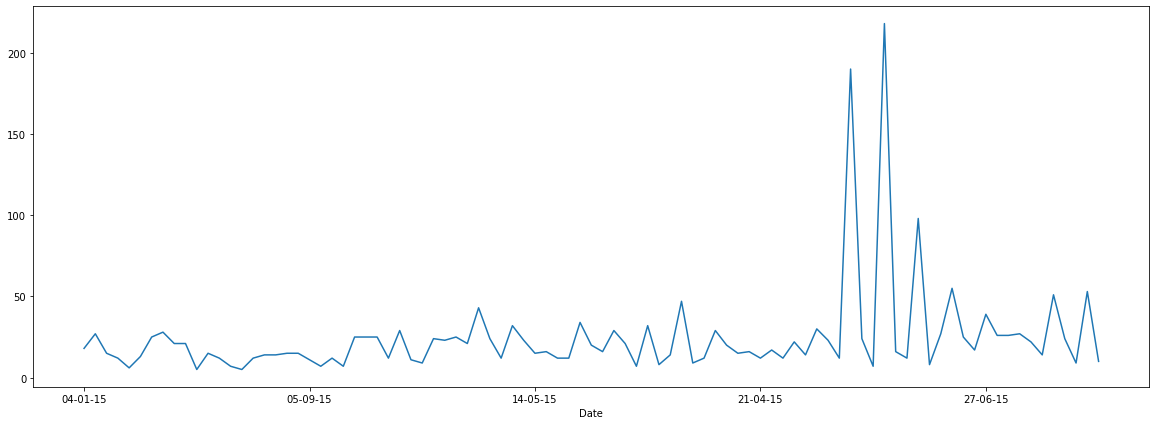

In [10]:
# Monthly number of complaints
comcast_complains.groupby("Date").count()["Customer Complaint"].plot(kind = "line", figsize = (20, 7))

<AxesSubplot:xlabel='Date'>

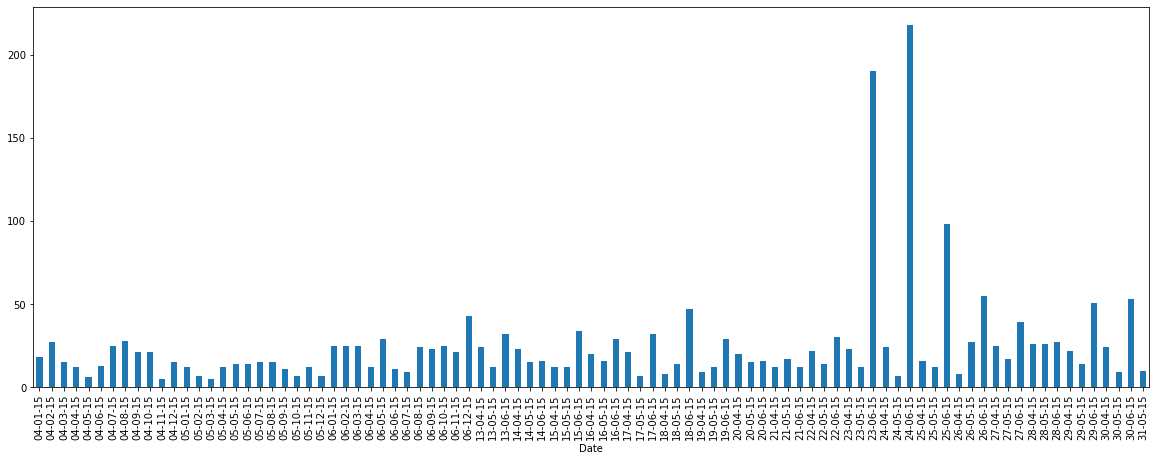

In [11]:
# Daily number of complaints
comcast_complains.groupby("Date").count()["Customer Complaint"].plot(kind = "bar", figsize = (20, 7))

<AxesSubplot:xlabel='Created_Day of Week', ylabel='count'>

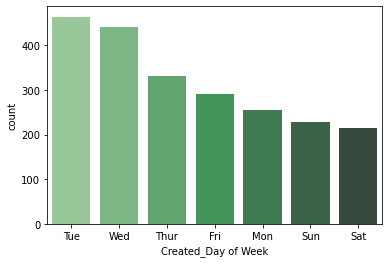

In [12]:
# Number of complaints based on created day of the week
# More number of complaints on Tuesday and Wednesday
comcast_complains['Date_month_year'] = pd.to_datetime(comcast_complains['Date_month_year'])
comcast_complains['Created_Month'] =  comcast_complains['Date_month_year'].apply(lambda x: x.month)
comcast_complains['Created_Day'] = comcast_complains['Date_month_year'].apply(lambda x: x.day)
comcast_complains['Created_Day of Week'] = comcast_complains['Date_month_year'].apply(lambda x: x.dayofweek)
daysOfWeek = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
comcast_complains['Created_Day of Week']=comcast_complains['Created_Day of Week'].map(daysOfWeek)
sns.countplot(x='Created_Day of Week', data = comcast_complains, order=comcast_complains['Created_Day of Week'].value_counts().index, palette ="Greens_d")

------

### 3 - Provide a table with the frequency of complaint types.

In [13]:
# bellow the list of complain types and their frequency
comcast_complains['Customer Complaint'] = comcast_complains['Customer Complaint'].str.title() 
ComplainT_freq = comcast_complains['Customer Complaint'].value_counts()
ComplainT_freq

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [14]:
common_complaints = comcast_complains['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      max_words=20,
                      background_color='white',
                      width=1200,
                      random_state=1,
                      colormap='Dark2_r',
                      height=1000).generate(common_complaints)

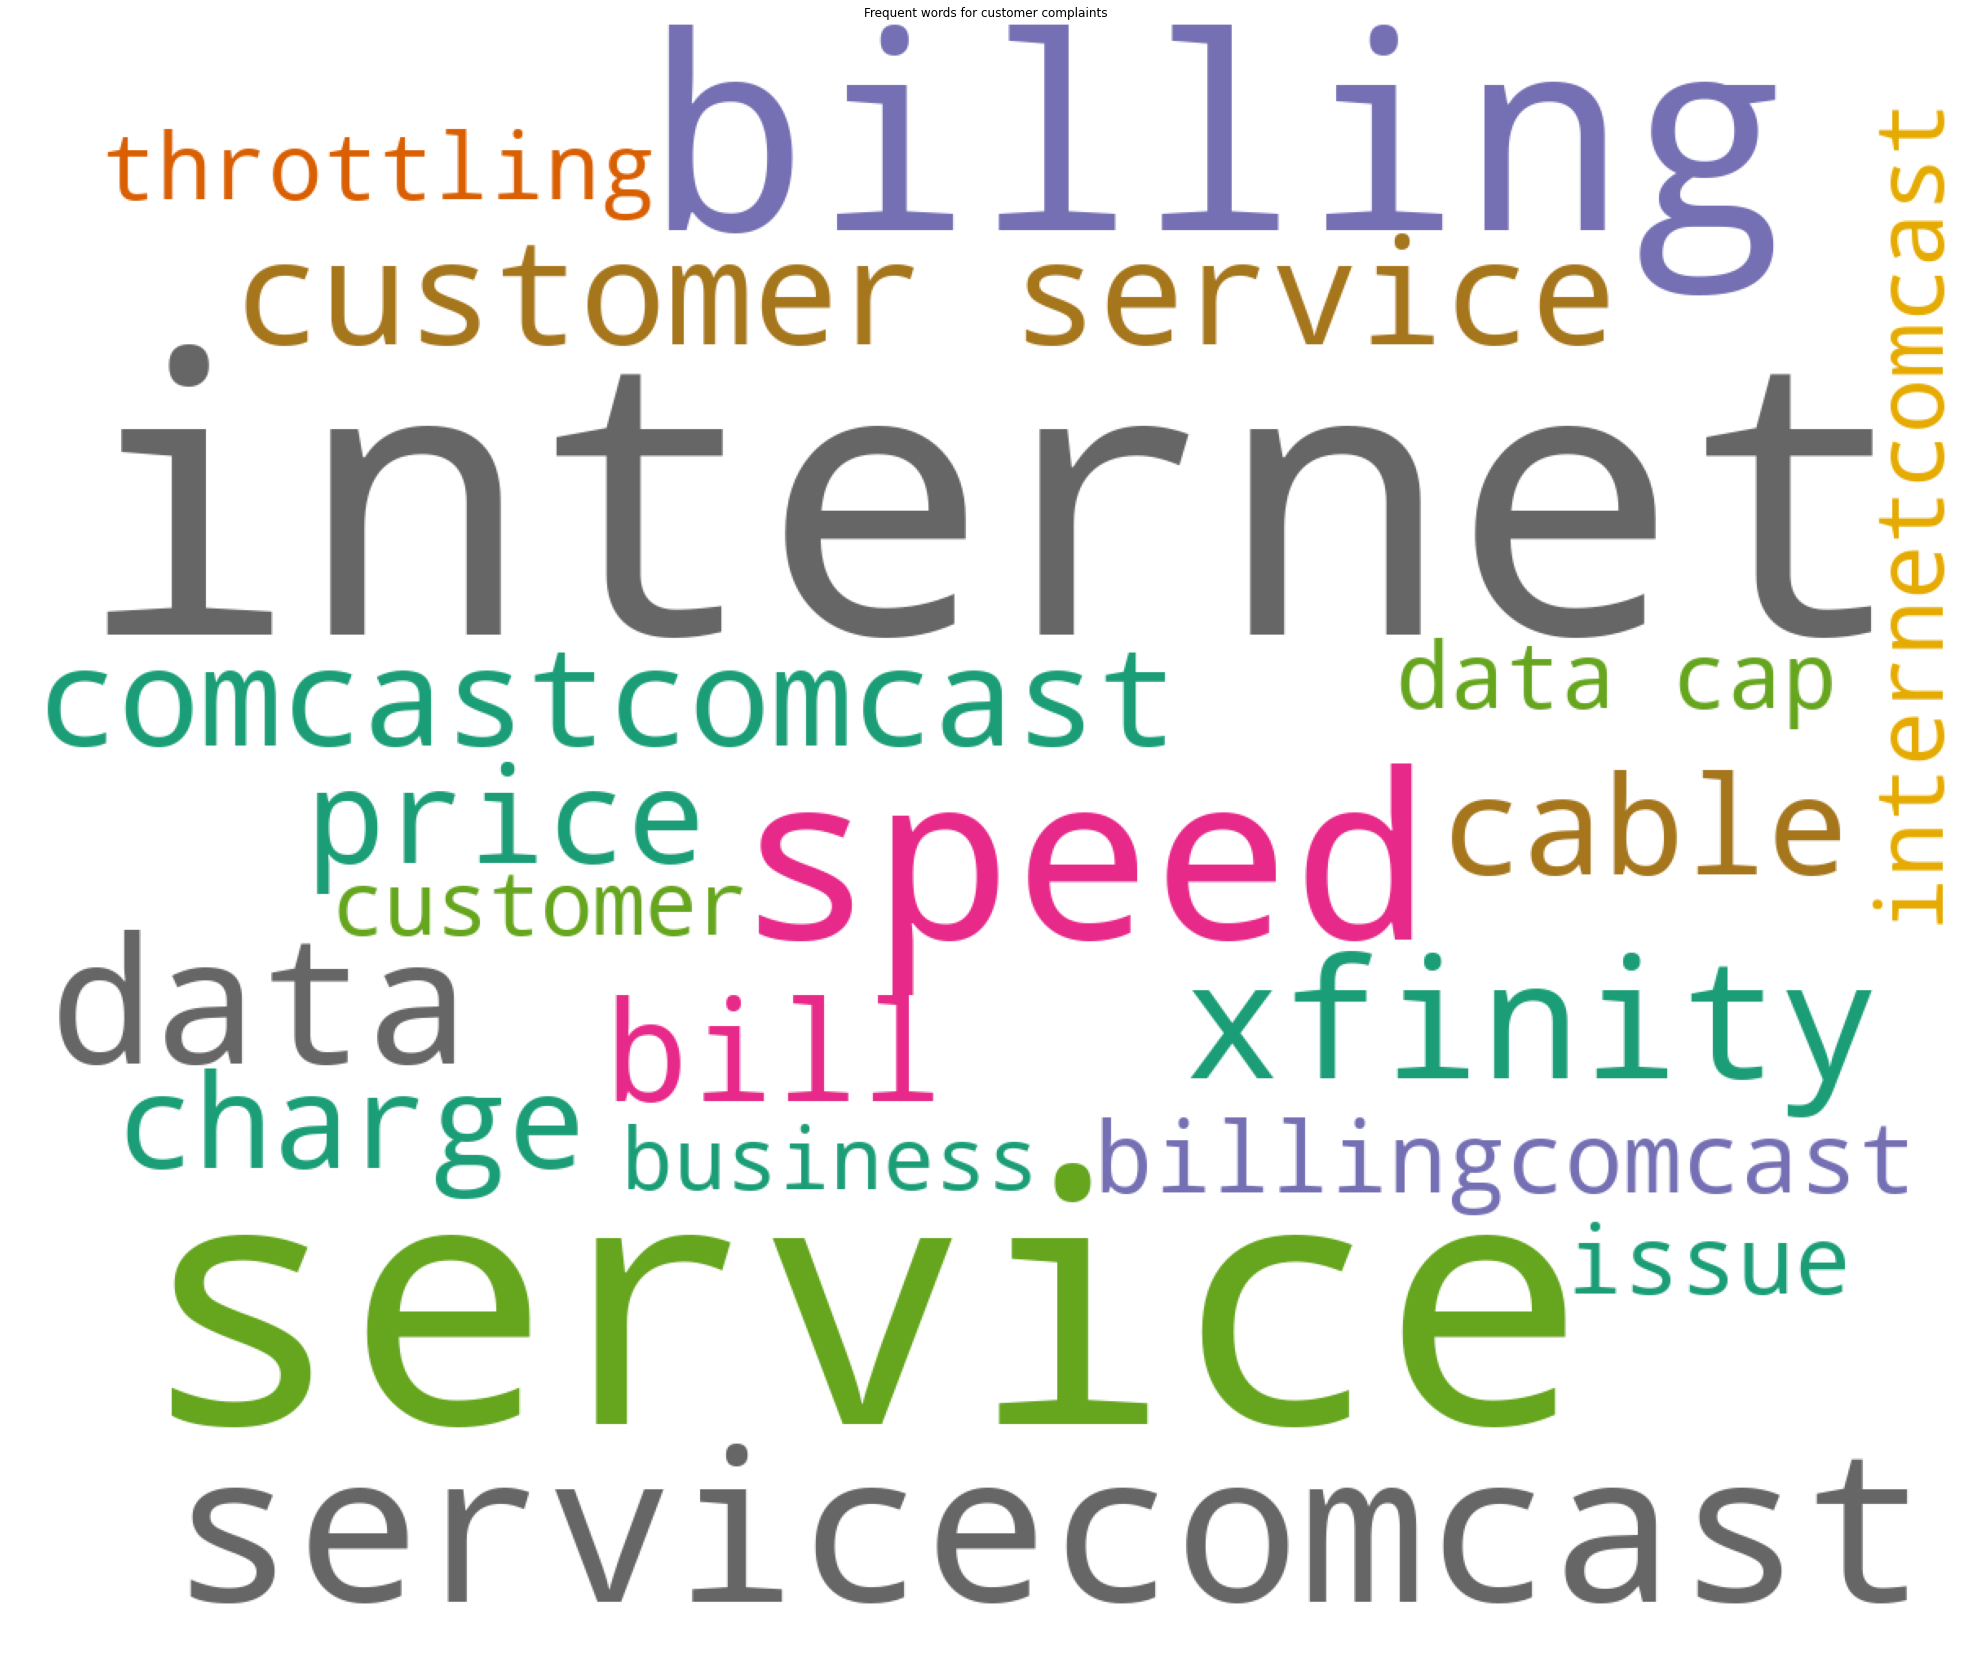

In [16]:
#Maximum complaints (Internet)
plt.figure( figsize=(40,30) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

In [17]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fortnite\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [20]:
doc_complete = comcast_complains['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [21]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [22]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1